In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Social_Network_Ads.csv")

In [3]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [4]:
df = df.drop(["User ID", "Gender"], axis = 1)

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
from sklearn.preprocessing import StandardScaler

In [7]:
sc = StandardScaler()

In [8]:
X = sc.fit_transform(X)

In [9]:
X[: 5]

array([[-1.78179743, -1.49004624],
       [-0.25358736, -1.46068138],
       [-1.11320552, -0.78528968],
       [-1.01769239, -0.37418169],
       [-1.78179743,  0.18375059]])

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from sklearn.decomposition import KernelPCA

In [13]:
kpca = KernelPCA(n_components = 2, kernel = "rbf")

In [14]:
X_train = kpca.fit_transform(X_train)

In [15]:
X_test = kpca.transform(X_test)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
model = LogisticRegression()

In [18]:
model.fit(X_train, y_train)

C:\Users\jaide\Anaconda3\envs\MLAI\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
y_pred = model.predict(X_test)

In [20]:
from matplotlib.colors import ListedColormap

In [21]:
from sklearn.metrics import confusion_matrix

In [22]:
cm = confusion_matrix(y_test, y_pred)

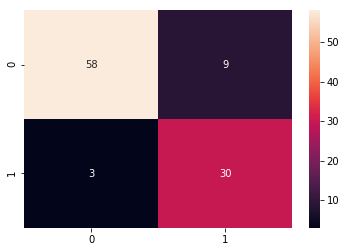

In [23]:
sns.heatmap(cm, annot = True)

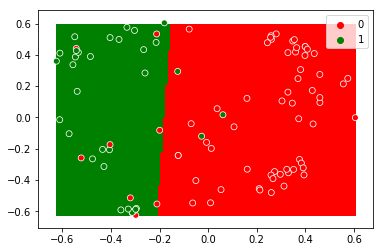

In [24]:
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            cmap = ListedColormap(["red", "green"]))
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {1: "green", 0: "red"}, hue = y_set)

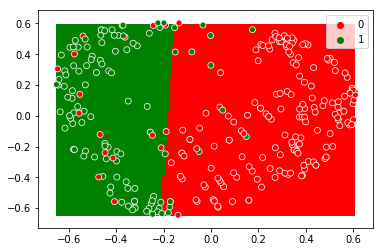

In [25]:
X_set, y_set = X_train, y_train
X1, X2 = np.meshgrid(np.arange(X_set[:, 0].min(), X_set[:, 0].max(), 0.01),
                    np.arange(X_set[:, 1].min(), X_set[:, 1].max(), 0.01))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape), 
            cmap = ListedColormap(["red", "green"]))
sns.scatterplot(X_set[:, 0], X_set[:, 1], palette = {1: "green", 0: "red"}, hue = y_set)